Task 1 - Finding Stationary and Non-Stationary Pair of Stocks

Importing required libraries

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts
%matplotlib inline

Downloading data for 2 firms - Apple and Microsoft, from 1st January 2023 to 25th May 2023.

In [ ]:
apple = yf.download('AAPL', start='2023-01-01', end='2023-05-25')
microsoft = yf.download('MSFT', start='2023-01-01', end='2023-05-25')

/tmp/ipython-input-3453832536.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download('AAPL', start='2023-01-01', end='2023-05-25')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3453832536.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  microsoft = yf.download('MSFT', start='2023-01-01', end='2023-05-25')
[*********************100%***********************]  1 of 1 completed


Plotting the Close Price of both the stocks for the entire time duration

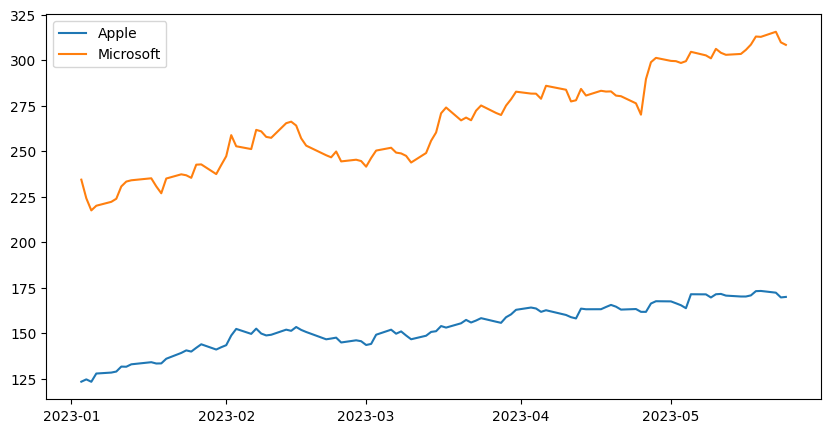

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(apple.index, apple['Close'], label='Apple')
plt.plot(microsoft.index, microsoft['Close'], label='Microsoft')
plt.legend()

Plotting the price of Microsoft vs Apple for the entire time duration.

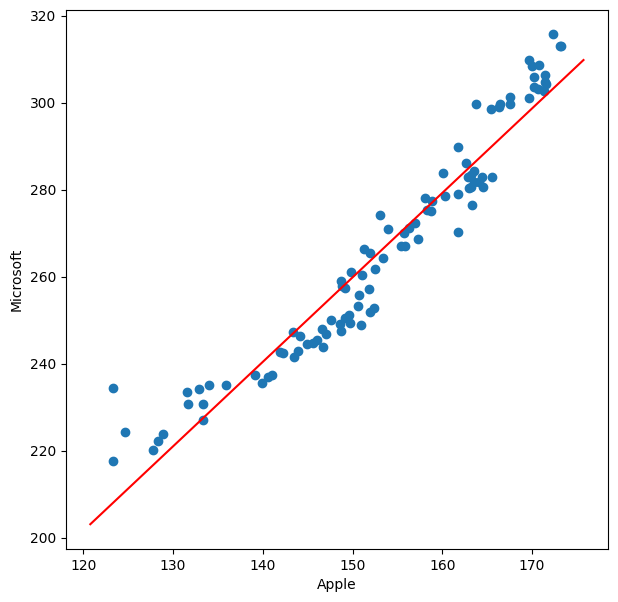

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(apple['Close'], microsoft['Close'])
plt.xlabel('Apple')
plt.ylabel('Microsoft')

slope, intercept = np.polyfit(
    apple['Close'].values.flatten(),
    microsoft['Close'].values.flatten(),
    1
)
# slope, intercept = np.polyfit(apple['Close'], microsoft['Close'], 1)
x_axes = np.array(plt.gca().get_xlim())
plt.plot(x_axes, intercept + x_axes * slope, color='red')

We see that the best fit line fits the data decently well, so the chances of the ratio being a stationary series is quite high. We now use the ADF test to check whether it is a stationary time series.


Statistics analysis

Statistic Test :  -3.881512578001467
p-value :  0.0021751965527791427
# n_lags :  0
No of observation:  98
 critical value 1% : -3.4989097606014496
 critical value 5% : -2.891516256916761
 critical value 10% : -2.5827604414827157


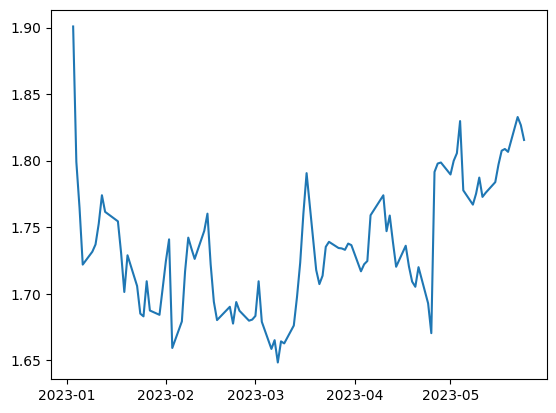

In [ ]:
# Convert to Series explicitly
apple_close = apple['Close'].iloc[:, 0]        # or apple['Close'].squeeze()
microsoft_close = microsoft['Close'].iloc[:, 0]

# Ratio
series = microsoft_close / apple_close

# Clean missing/infinite values
series = series.replace([np.inf, -np.inf], np.nan).dropna()

# Plot
plt.plot(series.index, series)

# ADF test
from statsmodels.tsa.stattools import adfuller
adf = adfuller(series.to_numpy())

print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")




Statistics analysis

Statistic Test :  -3.7154959270123586
p-value :  0.0039003950480393907
# n_lags :  0
No of observation:  98
 critical value 1% : -3.4989097606014496
 critical value 5% : -2.891516256916761
 critical value 10% : -2.5827604414827157


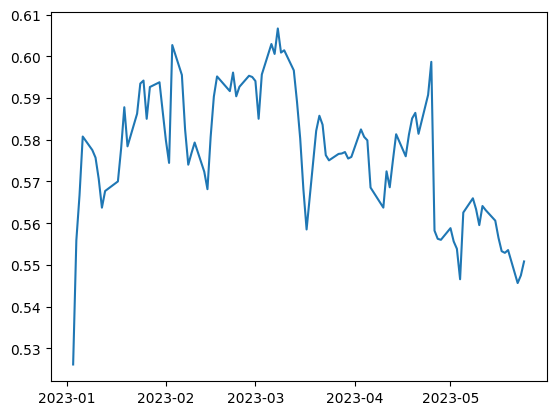

In [ ]:
# Convert Close columns to Series
apple_close = apple['Close'].iloc[:, 0]        # or apple['Close'].squeeze()
microsoft_close = microsoft['Close'].iloc[:, 0]

# Ratio series
series = apple_close / microsoft_close

# Clean missing/inf values
series = series.replace([np.inf, -np.inf], np.nan).dropna()

# Plot
plt.plot(series.index, series)

# ADF test
from statsmodels.tsa.stattools import adfuller
adf = adfuller(series.to_numpy().ravel())   # ensure 1D

print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


Since the p-values of both ratios are 0.001 and 0.003 (< 0.05), we can conclude that this is indeed a stationary series. It can also be observed by the graph, the mean roughly remains the same.

Now we will check two stocks for non-stationary series:

In [ ]:
amd = yf.download('AMD', start='2023-01-01', end='2023-05-25')
intel = yf.download('INTC', start='2023-01-01', end='2023-05-25')

/tmp/ipython-input-3074829289.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amd = yf.download('AMD', start='2023-01-01', end='2023-05-25')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3074829289.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  intel = yf.download('INTC', start='2023-01-01', end='2023-05-25')
[*********************100%***********************]  1 of 1 completed


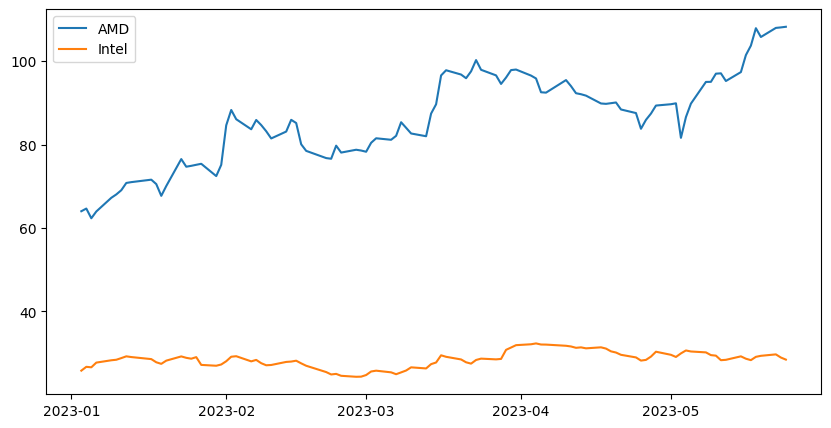

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(amd.index, amd['Close'], label='AMD')
plt.plot(intel.index, intel['Close'], label='Intel')
plt.legend()

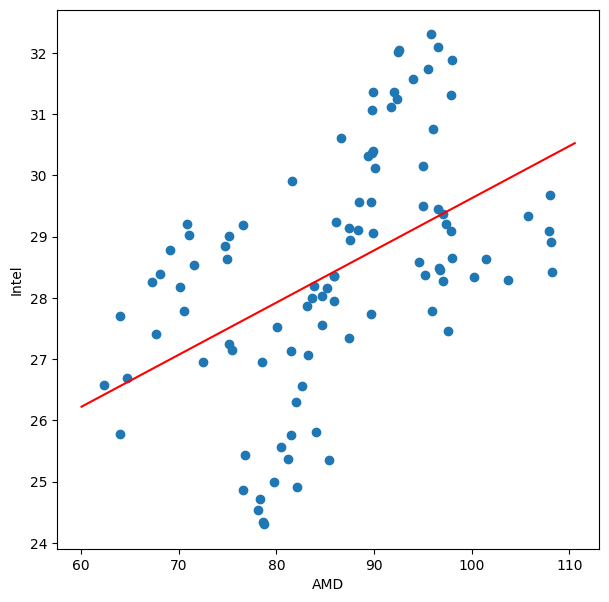

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(amd[('Close', 'AMD')], intel[('Close', 'INTC')])
plt.xlabel('AMD')
plt.ylabel('Intel')

# Linear regression
slope, intercept = np.polyfit(
    amd[('Close', 'AMD')].values,
    intel[('Close', 'INTC')].values,
    1
)

x_axes = np.array(plt.gca().get_xlim())
plt.plot(x_axes, intercept + slope * x_axes, color='red')


In [ ]:
print(amd.columns)
print(intel.columns)

MultiIndex([( 'Close', 'AMD'),
            (  'High', 'AMD'),
            (   'Low', 'AMD'),
            (  'Open', 'AMD'),
            ('Volume', 'AMD')],
           names=['Price', 'Ticker'])
MultiIndex([( 'Close', 'INTC'),
            (  'High', 'INTC'),
            (   'Low', 'INTC'),
            (  'Open', 'INTC'),
            ('Volume', 'INTC')],
           names=['Price', 'Ticker'])


The best fit line too is not very accurate, given the data's non linearity


Statistics analysis

Statistic Test :  -1.1831668530631287
p-value :  0.6807946689703193
# n_lags :  0
No of observation:  98
 critical value 1% : -3.4989097606014496
 critical value 5% : -2.891516256916761
 critical value 10% : -2.5827604414827157


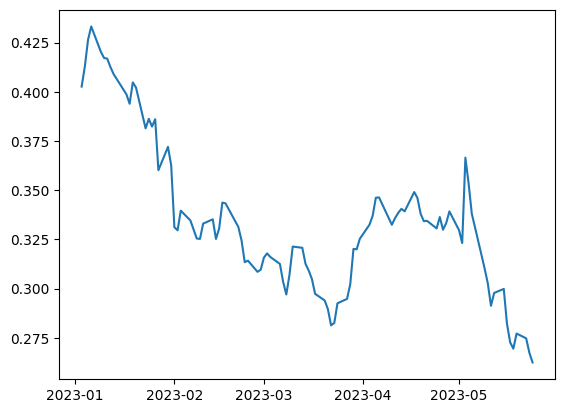

In [ ]:
# Select as Series using tuple
intel_close = intel[('Close', 'INTC')]
amd_close = amd[('Close', 'AMD')]

# Compute ratio series
series = intel_close / amd_close

# Clean up any NaNs / inf
series = series.replace([np.inf, -np.inf], np.nan).dropna()

# Plot
plt.plot(series.index, series)

# ADF test
from statsmodels.tsa.stattools import adfuller
adf = adfuller(series.values)   # pass as 1D array

print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")



Statistics analysis

Statistic Test :  -0.9923685760627863
p-value :  0.756037501139677
# n_lags :  2
No of observation:  96
 critical value 1% : -3.5003788874873405
 critical value 5% : -2.8921519665075235
 critical value 10% : -2.5830997960069446


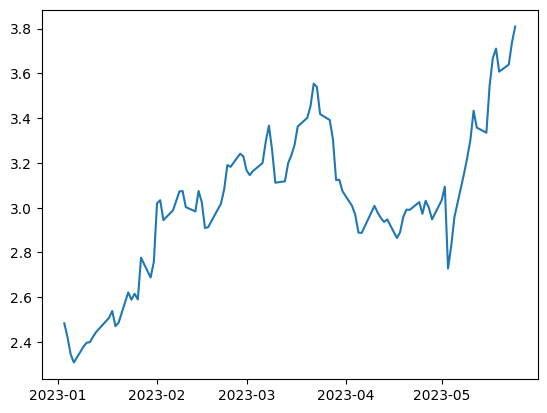

In [ ]:
# Using tuple
amd_close = amd[('Close', 'AMD')]
intel_close = intel[('Close', 'INTC')]

# Compute ratio series
series = amd_close / intel_close

# Remove NaN / Inf
series = series.replace([np.inf, -np.inf], np.nan).dropna()

# Plot
plt.plot(series.index, series)

# Run ADF test
from statsmodels.tsa.stattools import adfuller
adf = adfuller(series.values)  # ensure 1D array

print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")


The p-value of ADF tests are 0.68 and 0.84, which is very high. This indicates that this series is non-stationary.

Task 2 - Plotting Z-score of ratios of the 2 pairs of stocks

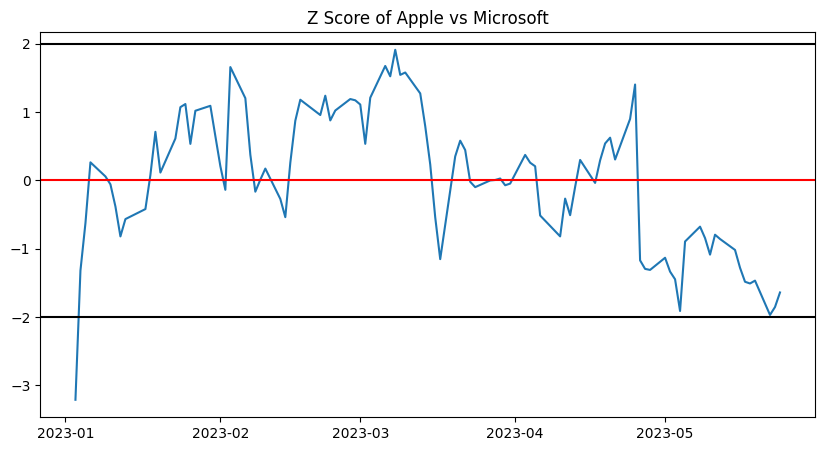

In [ ]:
# Select 1D Series from MultiIndex
apple_close = apple[('Close', 'AAPL')]
microsoft_close = microsoft[('Close', 'MSFT')]

# Compute ratio
ratio_1 = apple_close / microsoft_close

# Compute z-score
z_score_1 = (ratio_1 - ratio_1.mean()) / ratio_1.std()

# Plot
plt.figure(figsize=(10,5))
plt.title('Z Score of Apple vs Microsoft')
plt.plot(z_score_1.index, z_score_1)

# Plot mean and ±2 std lines
mean_val = z_score_1.mean()
std_val = z_score_1.std()
plt.axhline(y=mean_val, color='red')
plt.axhline(y=mean_val + 2*std_val, color='black')
plt.axhline(y=mean_val - 2*std_val, color='black')


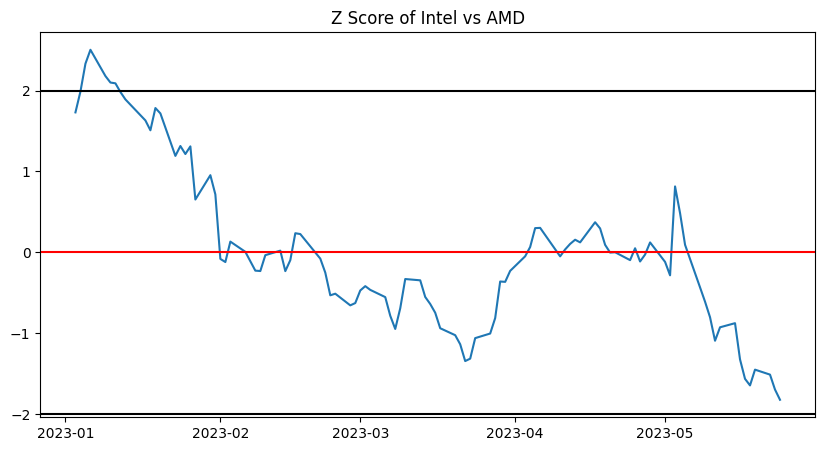

In [ ]:
# Select 1D Series from MultiIndex
intel_close = intel[('Close', 'INTC')]
amd_close = amd[('Close', 'AMD')]

# Compute ratio and z-score
ratio_2 = intel_close / amd_close
z_score_2 = (ratio_2 - ratio_2.mean()) / ratio_2.std()

# Plot
plt.figure(figsize=(10,5))
plt.title('Z Score of Intel vs AMD')
plt.plot(z_score_2.index, z_score_2)

# Plot mean and ±2 std lines
mean_val = z_score_2.mean()
std_val = z_score_2.std()
plt.axhline(y=mean_val, color='red')
plt.axhline(y=mean_val + 2*std_val, color='black')
plt.axhline(y=mean_val - 2*std_val, color='black')


Task 3 - Sharpe Ratio of Apple

/tmp/ipython-input-3728921345.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('AAPL', start='2022-05-25', end='2023-05-25')
[*********************100%***********************]  1 of 1 completed

Volatility = Ticker
AAPL    0.263643
dtype: float64
Sharpe Ratio = Ticker
AAPL    1.843291
dtype: float64


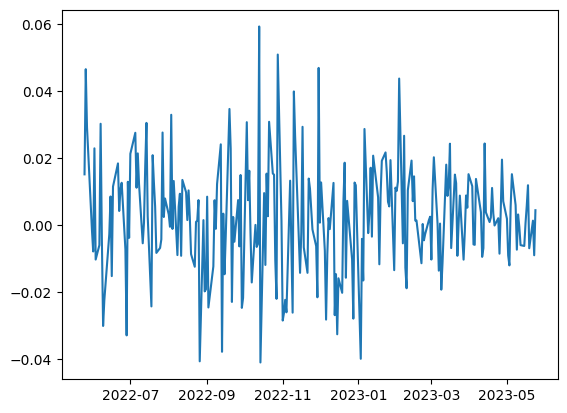

In [ ]:
stock = yf.download('AAPL', start='2022-05-25', end='2023-05-25')

daily_returns = (stock['Close'] - stock['Open']) / stock['Open']
risk_free_rate = 3/100
volatility = daily_returns.std() * np.sqrt(252)
print("Volatility = {}".format(volatility))

sharpe_ratio = (daily_returns.mean() * 252 - risk_free_rate) / volatility
print("Sharpe Ratio = {}".format(sharpe_ratio))

plt.plot(daily_returns)

Task 4 - Golden Cross and Death Cross

Getting data for 2021 - 2023:

In [ ]:
stock = yf.download('AAPL', start='2021-05-25', end='2023-05-25')

/tmp/ipython-input-2861107290.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('AAPL', start='2021-05-25', end='2023-05-25')
[*********************100%***********************]  1 of 1 completed


Plotting the moving averages

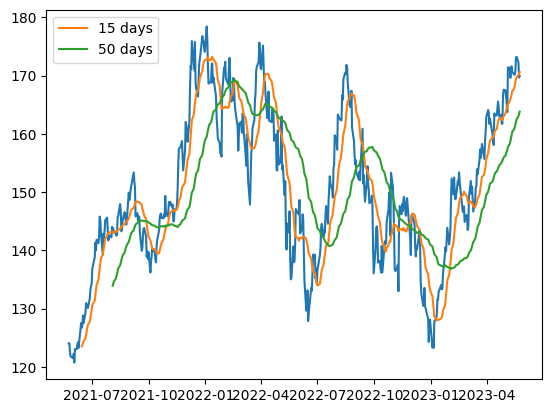

In [ ]:
SMA_15 = stock['Close'].rolling(15).mean()
SMA_50 = stock['Close'].rolling(50).mean()

plt.plot(stock.index, stock['Close'])
plt.plot(SMA_15.index, SMA_15, label='15 days')
plt.plot(SMA_50.index, SMA_50, label='50 days')
plt.legend()

Plotting points of intersection of the 2 moving averages

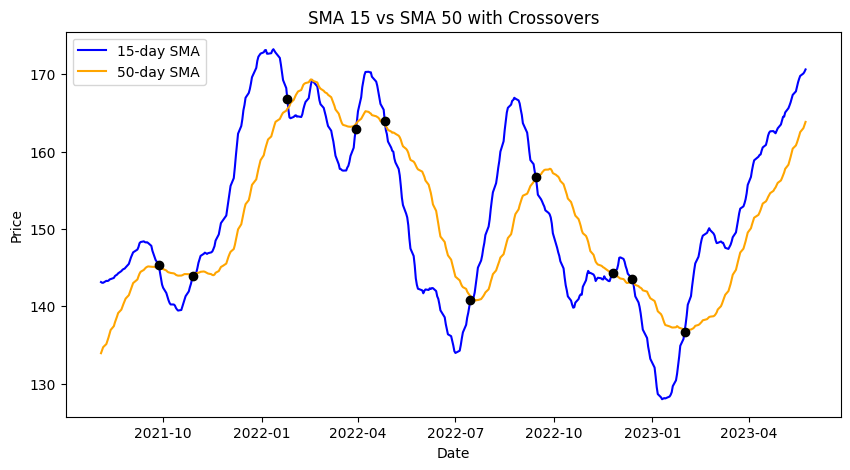

In [ ]:
# Compute SMAs
SMA_15 = stock['Close'].rolling(window=15, min_periods=15).mean()
SMA_50 = stock['Close'].rolling(window=50, min_periods=50).mean()

# Align SMAs: drop NaNs
SMA = pd.concat([SMA_15, SMA_50], axis=1).dropna()
SMA_15_aligned = SMA.iloc[:,0]
SMA_50_aligned = SMA.iloc[:,1]

# Find intersection points (crossovers)
intersection_points = np.where(np.diff(np.sign(SMA_15_aligned - SMA_50_aligned)) != 0)[0]

# Plot SMAs
plt.figure(figsize=(10,5))
plt.plot(SMA_15_aligned.index, SMA_15_aligned, label='15-day SMA', color='blue')
plt.plot(SMA_50_aligned.index, SMA_50_aligned, label='50-day SMA', color='orange')

# Plot black dots at crossovers
plt.scatter(SMA_15_aligned.index[intersection_points], SMA_15_aligned.iloc[intersection_points], color='black', zorder=5)

plt.title('SMA 15 vs SMA 50 with Crossovers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The first intersection point is a death cross, because the 15 day moving average becomes lower than the 50 day moving average. Then, golden crosses and death crosses will alternate.

Let us show the golden cross by green color and death cross by red color

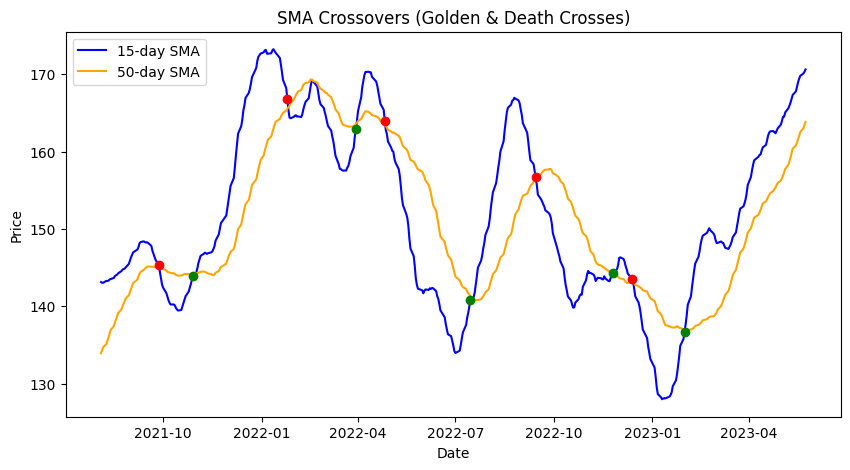

In [ ]:
# Align SMAs (drop initial NaNs)
SMA = pd.concat([SMA_15, SMA_50], axis=1).dropna()
SMA_15_aligned = SMA.iloc[:,0]
SMA_50_aligned = SMA.iloc[:,1]

# Find intersection points
intersection_points = np.where(np.diff(np.sign(SMA_15_aligned - SMA_50_aligned)) != 0)[0]

# Separate golden and death crosses
golden_cross = intersection_points[1::2]  # SMA_15 crossing above SMA_50
death_cross = intersection_points[::2]    # SMA_15 crossing below SMA_50

# Plot SMAs
plt.figure(figsize=(10,5))
plt.plot(SMA_15_aligned.index, SMA_15_aligned, label='15-day SMA', color='blue')
plt.plot(SMA_50_aligned.index, SMA_50_aligned, label='50-day SMA', color='orange')

# Plot crosses using the aligned Series
plt.scatter(SMA_15_aligned.index[golden_cross], SMA_15_aligned.iloc[golden_cross], color='green', zorder=5)
plt.scatter(SMA_15_aligned.index[death_cross], SMA_15_aligned.iloc[death_cross], color='red', zorder=5)

plt.title('SMA Crossovers (Golden & Death Crosses)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
